In [1]:
### y_hat=    0.0545238*'TV'   +    0.1044582*'Radio'   +   0*'Newspaper'   +    4.635663222802281

- **Linear Regression (Advertising Dataset)**: [Kaggle Advertising Dataset](https://www.kaggle.com/code/zebashaikh/linear-regression-on-advertising-dataset)

# Advertising-LinearRegression


import analysis libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

format the notebook

In [3]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 
pd.set_option('display.max_rows', 100)
pd.set_option('display.width',1000)

plot_style

In [4]:
plt.style.use('dark_background')

import data

In [5]:
advertising=pd.read_csv('advertising.csv')

In [6]:
#advertising.isnull().sum()
#advertising.info()
advertising.describe()
#advertising.head()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


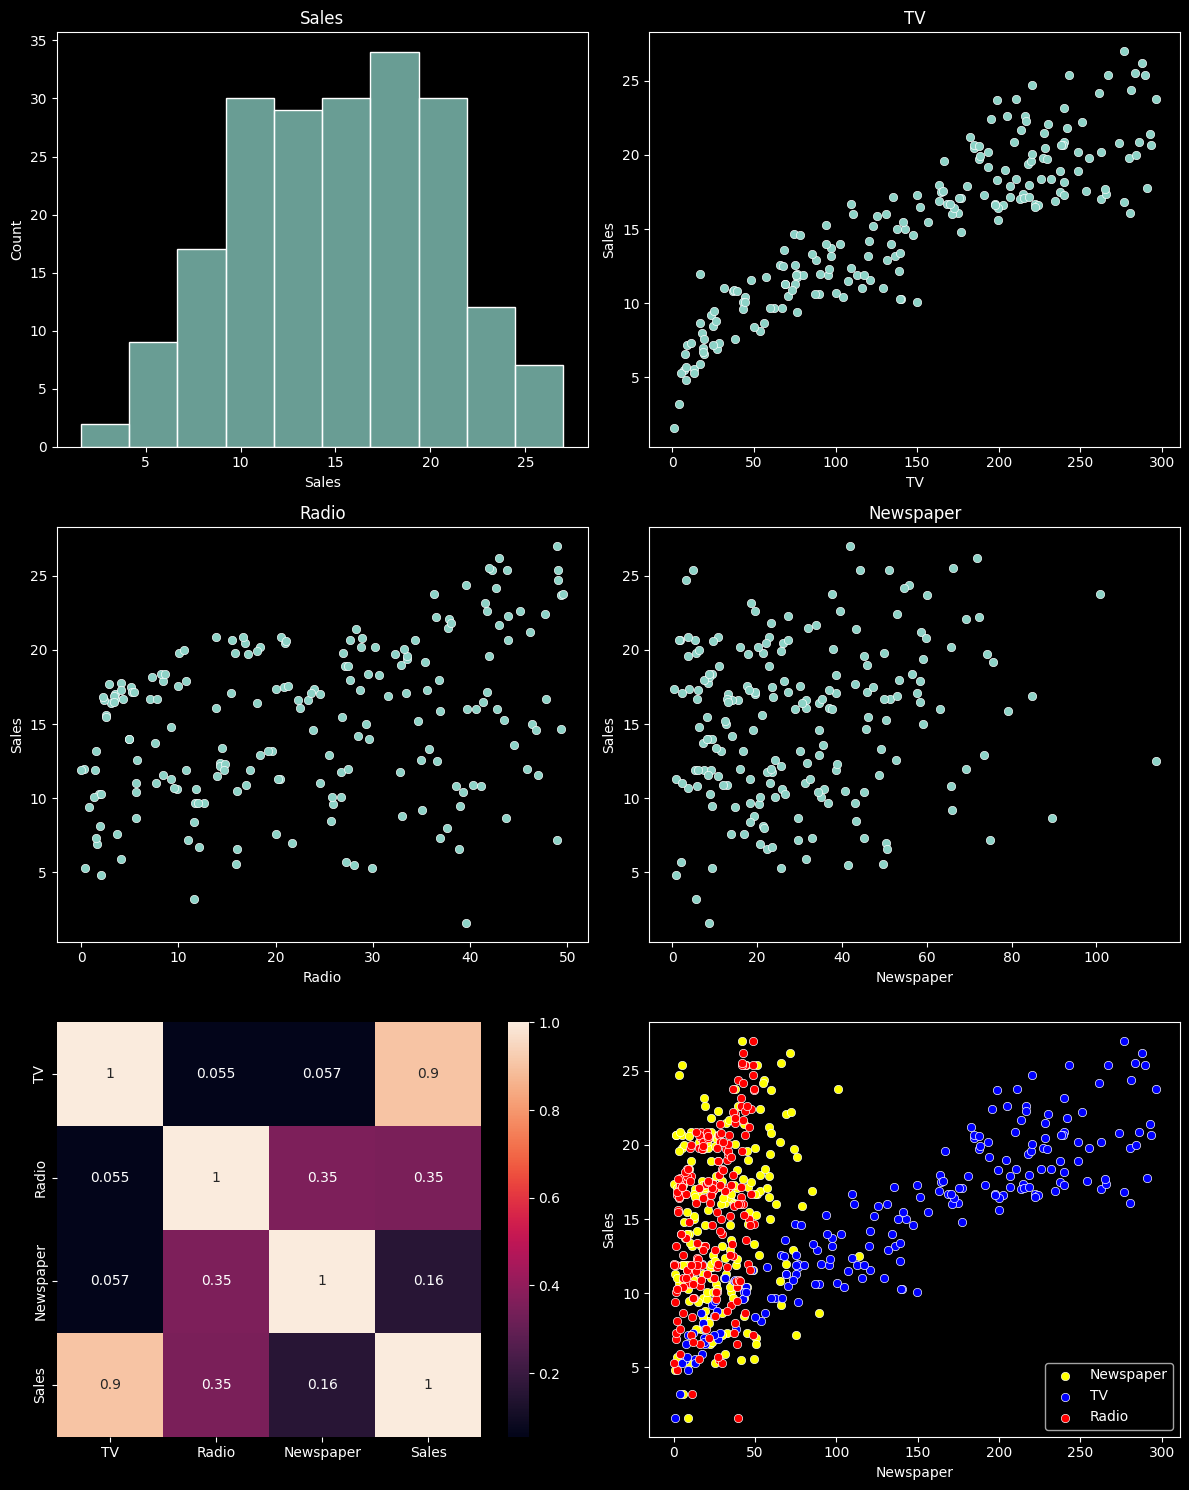

In [7]:

num_rows=3
num_cols=2
plt.figure(figsize=(num_cols*6,num_rows*5))
plt.subplot(num_rows,num_cols,1)
sns.histplot(advertising['Sales'])
plt.title('Sales')
features=[col for col in advertising if col!='Sales' ]
next_axis=2                                         #---------------> start point for plot axes in loop
for ax in range(next_axis,next_axis+len(features)):
    cur_feature=features[ax-next_axis]
    plt.subplot(num_rows,num_cols,ax)
    sns.scatterplot(data=advertising,x=cur_feature,y='Sales')
    plt.title(cur_feature)
plt.subplot(num_rows,num_cols,5)   #   5 is axis after loop
sns.heatmap(advertising.corr(),annot=True)
plt.subplot(num_rows,num_cols,6)
sns.scatterplot(x=advertising['Newspaper'],y=advertising['Sales'],color='yellow',label='Newspaper')  #add labels for legends
sns.scatterplot(x=advertising['TV'],y=advertising['Sales'],color='blue',label='TV')
sns.scatterplot(x=advertising['Radio'],y=advertising['Sales'],color='red',label='Radio')

plt.legend() #works with label
plt.tight_layout()
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
X_features=advertising[['TV','Radio']]#'Newspaper',
X_one=advertising[['TV']]  
X=X_features
y=advertising['Sales']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=4)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
model=LinearRegression()

cv_scores=cross_val_score(model,X,y,cv=5,scoring='r2')
print('mean: ',cv_scores.mean(),'samples: ',cv_scores)

mean:  0.8958535029714982 samples:  [0.87617457 0.93226787 0.92150565 0.84560973 0.90370969]


# Newspaper does not add anything, so it isn't used

In [10]:
model.fit(x_train,y_train)
slope=model.coef_
intercept=model.intercept_
print('m: ',slope,'b: ', intercept)

m:  [0.0545238 0.1044582] b:  4.635663222802281


In [11]:
from sklearn.metrics import r2_score as r2
y_pred=model.predict(x_test)
r2(y_test,y_pred)

0.9194675014108287

In [12]:
calculated_y = (advertising.iloc[:,:3] @ [ 0.0545238, 0.1044582,0])+ 4.635663222802281
y_pred=model.predict(X)
advertising['calculated_y']=calculated_y
advertising['y_pred']=y_pred
advertising.head()

,TV,Radio,Newspaper,Sales,calculated_y,y_pred
0,230.1,37.8,69.2,22.1,21.130110,21.130110
1,44.5,39.3,45.1,10.4,11.167180,11.167180
2,17.2,45.9,69.3,12.0,10.368104,10.368104
3,151.5,41.3,58.5,16.5,17.210143,17.210143
4,180.8,10.8,58.4,17.9,15.621715,15.621715


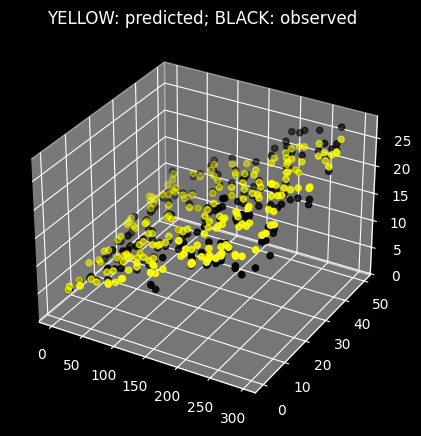

In [13]:
tv=advertising['TV']
radio=advertising['Radio']
newspaper=advertising['Newspaper']
sales=advertising['Sales']
pred=advertising['y_pred']

fig, axes = plt.subplots(1,1,subplot_kw={'projection': '3d'}, figsize=(5,5))
axes.scatter(tv,radio,y_pred,color='yellow')
axes.scatter(tv,radio,sales,color='black')
plt.title('YELLOW: predicted; BLACK: observed')
plt.show()
